## Reading in wine data, adding quality column

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn import datasets
from sklearn import manifold
from skimage.io import imshow

In [3]:
data_csv='../datasets/wine.csv'

In [4]:
data=pd.read_csv(data_csv)

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [7]:
qualities=np.sort(data.quality.unique())

In [8]:
{x:count for count,x in enumerate(qualities)}

{3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5}

In [9]:
quality_mapping={x:count for count,x in enumerate(qualities)}

In [10]:
data.quality=data.quality.map(quality_mapping)

In [11]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [12]:
data.shape

(1599, 12)

## Continuing with wine data

In [13]:
from sklearn import model_selection

In [14]:
nfolds=5
kf=model_selection.KFold(n_splits=nfolds)

In [15]:
type(kf.split(data))

generator

In [16]:
list(kf.split(data))[3]

(array([   0,    1,    2, ..., 1596, 1597, 1598]),
 array([ 960,  961,  962,  963,  964,  965,  966,  967,  968,  969,  970,
         971,  972,  973,  974,  975,  976,  977,  978,  979,  980,  981,
         982,  983,  984,  985,  986,  987,  988,  989,  990,  991,  992,
         993,  994,  995,  996,  997,  998,  999, 1000, 1001, 1002, 1003,
        1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014,
        1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025,
        1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036,
        1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047,
        1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058,
        1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069,
        1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080,
        1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091,
        1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100,

In [17]:
len(list(kf.split(data)))

5

Has the `old_idx` and `new_idx`. Make new row with fold number as additional column.

In [18]:
for fold_num, (old_idx,new_idx) in enumerate(kf.split(data)):
    data.loc[new_idx,'kfold'] = fold_num

In [19]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2,0.0


In [20]:
data[data.kfold==2]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
640,9.9,0.54,0.45,2.3,0.071,16.0,40.0,0.99910,3.39,0.62,9.4,2,2.0
641,9.5,0.59,0.44,2.3,0.071,21.0,68.0,0.99920,3.46,0.63,9.5,2,2.0
642,9.9,0.54,0.45,2.3,0.071,16.0,40.0,0.99910,3.39,0.62,9.4,2,2.0
643,9.5,0.59,0.44,2.3,0.071,21.0,68.0,0.99920,3.46,0.63,9.5,2,2.0
644,9.9,0.54,0.45,2.3,0.071,16.0,40.0,0.99910,3.39,0.62,9.4,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,8.5,0.21,0.52,1.9,0.090,9.0,23.0,0.99648,3.36,0.67,10.4,2,2.0
956,9.0,0.36,0.52,2.1,0.111,5.0,10.0,0.99568,3.31,0.62,11.3,3,2.0
957,9.5,0.37,0.52,2.0,0.088,12.0,51.0,0.99613,3.29,0.58,11.1,3,2.0
958,6.4,0.57,0.12,2.3,0.120,25.0,36.0,0.99519,3.47,0.71,11.3,4,2.0


### Check if the quality target in each fold is skewed by taking a histogram

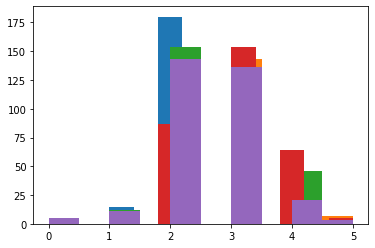

In [21]:
for fold in range(0,nfolds):
    plt.hist(data[data.kfold==fold].quality)

So, clearly the data set is skewed (some classes 0, 1, 5 have not many samples). So training on skewed data might not correctly predict the test set.

## Use each of these folds to cross validate

In [90]:
from sklearn import tree 
from sklearn import metrics

Define function that trains and tests.

In [123]:
def onefold(fold,train_data, test_data,cols,depth=5):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(train_data[cols],train_data.quality)
    train_predictions=clf.predict(train_data[cols])
    test_predictions=clf.predict(test_data[cols])
    train_accuracy=metrics.accuracy_score(train_data.quality,train_predictions)
    test_accuracy=metrics.accuracy_score(test_data.quality,test_predictions)
    return np.array([fold,train_accuracy,test_accuracy])   

Check for one fold

In [124]:
train_cols=list(data.columns[:-2])
fold=0
train_data=data[data.kfold!=fold].copy().reset_index(drop=True)
test_data=data[data.kfold==fold].copy().reset_index(drop=True)
onefold(fold,train_data,test_data,cols=train_cols,depth=5)

array([0.       , 0.6786552, 0.53125  ])

Loop over all folds

In [125]:
train_cols=list(data.columns[:-2])
result=np.zeros((nfolds,3))
for fold in range(0,nfolds):
    train_data=data[data.kfold!=fold].copy().reset_index(drop=True)
    test_data=data[data.kfold==fold].copy().reset_index(drop=True)
    result[fold,:]=onefold(fold,train_data,test_data,cols=train_cols,depth=8)        

In [126]:
result

array([[0.        , 0.80297107, 0.521875  ],
       [1.        , 0.79749805, 0.534375  ],
       [2.        , 0.79671618, 0.50625   ],
       [3.        , 0.82173573, 0.496875  ],
       [4.        , 0.81171875, 0.51410658]])

plot!

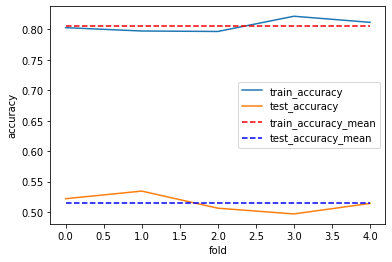

In [127]:
plt.plot(result[:,0],result[:,1],label='train_accuracy')
plt.plot(result[:,0],result[:,2],label='test_accuracy')
plt.plot(result[:,0],nfolds*[result[:,1].mean()],'r--', label='train_accuracy_mean')
plt.plot(result[:,0],nfolds*[result[:,2].mean()],'b--', label='test_accuracy_mean')
plt.xlabel("fold")
plt.ylabel("accuracy")
plt.legend()
plt.show()

Still not that great.